In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Training Data Set_N.csv')

In [3]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [6]:
ms=df.isnull().sum()
ms[ms>0]

distance         1211
engine_power     1439
body_type       49379
dtype: int64

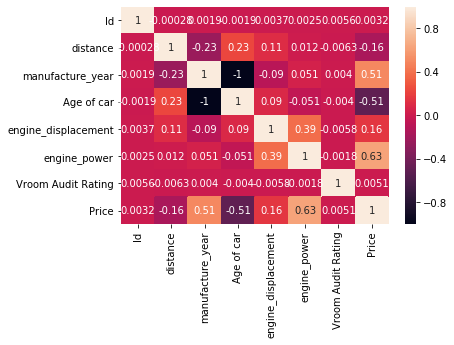

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
for col in df.columns:
    print((df[col].value_counts()/len(df[col]))*100)

26611    0.001869
35588    0.001869
47810    0.001869
41665    0.001869
43712    0.001869
70327    0.001869
72374    0.001869
66229    0.001869
68276    0.001869
78515    0.001869
74417    0.001869
76464    0.001869
29339    0.001869
31386    0.001869
25241    0.001869
27288    0.001869
53903    0.001869
55950    0.001869
49805    0.001869
51852    0.001869
62091    0.001869
64138    0.001869
57993    0.001869
60040    0.001869
37511    0.001869
45763    0.001869
35524    0.001869
33477    0.001869
31450    0.001869
47874    0.001869
           ...   
64821    0.001869
62772    0.001869
52531    0.001869
28007    0.001869
56689    0.001869
28071    0.001869
42366    0.001869
26022    0.001869
32165    0.001869
30116    0.001869
77199    0.001869
75150    0.001869
69003    0.001869
66954    0.001869
73097    0.001869
71048    0.001869
44415    0.001869
48509    0.001869
50546    0.001869
46460    0.001869
36219    0.001869
34170    0.001869
40313    0.001869
38264    0.001869
60791    0

In [9]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['Maker',
 'model',
 'Location',
 'Owner Type',
 'body_type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [10]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [11]:
df['body_type'].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [12]:
df=df.drop('body_type',axis=1)

In [13]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['Maker',
 'model',
 'Location',
 'Owner Type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [14]:
df['door_count'].value_counts()

4       33808
5        7630
None     7534
2        4348
3         185
6           8
1           2
Name: door_count, dtype: int64

In [15]:
df['seat_count'].value_counts()

5       38824
None     8511
4        4467
7         852
2         725
3         109
6          23
9           2
1           1
8           1
Name: seat_count, dtype: int64

In [16]:
df['door_count']=df['door_count'].replace('None',np.nan)

In [17]:
df['seat_count']=df['seat_count'].replace('None',np.nan)

In [18]:
ms=df.isnull().sum()
ms[ms>0]/100

distance        12.11
engine_power    14.39
door_count      75.34
seat_count      85.11
dtype: float64

In [19]:
df['distance']=df['distance'].fillna(df['distance'].median())

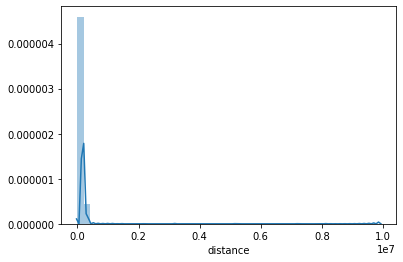

In [20]:
sns.distplot(df['distance'])

In [21]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
distance                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count             7534
seat_count             8511
fuel_type                 0
Price                     0
dtype: int64

In [22]:
df['engine_power']=df['engine_power'].fillna(df['engine_power'].mean())

In [23]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
distance                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
Vroom Audit Rating        0
transmission              0
door_count             7534
seat_count             8511
fuel_type                 0
Price                     0
dtype: int64

In [24]:
df['seat_count'].value_counts()

5    38824
4     4467
7      852
2      725
3      109
6       23
9        2
1        1
8        1
Name: seat_count, dtype: int64

In [25]:
df['seat_count']=df['seat_count'].replace(np.nan,'5')

In [26]:
df['seat_count'].value_counts()

5    47335
4     4467
7      852
2      725
3      109
6       23
9        2
1        1
8        1
Name: seat_count, dtype: int64

In [27]:
df['door_count'].value_counts()

4    33808
5     7630
2     4348
3      185
6        8
1        2
Name: door_count, dtype: int64

In [28]:
df['door_count']=df['door_count'].replace(np.nan,'4')

In [29]:
df['door_count'].value_counts()

4    41342
5     7630
2     4348
3      185
6        8
1        2
Name: door_count, dtype: int64

In [30]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 16 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 6.5+ MB


In [32]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [33]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['Maker',
 'model',
 'Location',
 'Owner Type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
le=LabelEncoder
le=LabelEncoder()    # label encoding
df['Maker']=le.fit_transform(df['Maker']) 
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['transmission']=le.fit_transform(df['transmission'])

df['Owner Type']=le.fit_transform(df['Owner Type'])
df['Location']=le.fit_transform(df['Location'])
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,6,octavia,0,65520.0,2,1964,55,1964,147.0,8,1,4,5,1,543764.25
1,25002,2,panda,0,27750.0,3,2012,7,1242,51.0,6,1,4,4,1,401819.25
2,25003,1,x1,5,46000.0,3,2014,5,1995,105.0,7,0,4,5,0,2392855.50
3,25004,5,juke,9,43949.0,3,2011,8,1618,140.0,7,1,4,5,1,958606.50
4,25005,1,x5,6,59524.0,1,2012,7,2993,180.0,7,0,4,5,0,3085561.50


In [37]:
df['model']=le.fit_transform(df['model']) 
df['door_count']=le.fit_transform(df['door_count']) 
df['seat_count']=le.fit_transform(df['seat_count']) 

In [38]:
df.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,6,8,0,65520.0,2,1964,55,1964,147.0,8,1,3,4,1,543764.25
1,25002,2,9,0,27750.0,3,2012,7,1242,51.0,6,1,3,3,1,401819.25
2,25003,1,18,5,46000.0,3,2014,5,1995,105.0,7,0,3,4,0,2392855.50
3,25004,5,6,9,43949.0,3,2011,8,1618,140.0,7,1,3,4,1,958606.50
4,25005,1,20,6,59524.0,1,2012,7,2993,180.0,7,0,3,4,0,3085561.50


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 16 columns):
Id                     53515 non-null int64
Maker                  53515 non-null int32
model                  53515 non-null int32
Location               53515 non-null int32
distance               53515 non-null float64
Owner Type             53515 non-null int32
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null int32
door_count             53515 non-null int32
seat_count             53515 non-null int32
fuel_type              53515 non-null int32
Price                  53515 non-null float64
dtypes: float64(3), int32(8), int64(5)
memory usage: 4.9 MB


In [40]:
df.corr()['Price'].nlargest(10)

Price                  1.000000
engine_power           0.621601
manufacture_year       0.506707
model                  0.239013
engine_displacement    0.162072
seat_count             0.081610
Vroom Audit Rating     0.005109
Id                     0.003195
Owner Type            -0.003125
Location              -0.003695
Name: Price, dtype: float64

In [41]:
df=df.drop(['Id','manufacture_year'],axis=1)

In [42]:
df.corr()['Price'].abs().nlargest(10)

Price                  1.000000
engine_power           0.621601
Maker                  0.568821
Age of car             0.506707
transmission           0.499240
fuel_type              0.316354
model                  0.239013
engine_displacement    0.162072
distance               0.155366
seat_count             0.081610
Name: Price, dtype: float64

In [43]:
df.corr()['Price'].nlargest(10)

Price                  1.000000
engine_power           0.621601
model                  0.239013
engine_displacement    0.162072
seat_count             0.081610
Vroom Audit Rating     0.005109
Owner Type            -0.003125
Location              -0.003695
door_count            -0.050817
distance              -0.155366
Name: Price, dtype: float64

In [44]:
df.corr()['Price']

Maker                 -0.568821
model                  0.239013
Location              -0.003695
distance              -0.155366
Owner Type            -0.003125
Age of car            -0.506707
engine_displacement    0.162072
engine_power           0.621601
Vroom Audit Rating     0.005109
transmission          -0.499240
door_count            -0.050817
seat_count             0.081610
fuel_type             -0.316354
Price                  1.000000
Name: Price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
y=df['Price']
X=df.drop('Price',axis=1)

In [46]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [49]:
lin_reg=sm.OLS(y_train,X_train) #building stats model in tain dataset
result=lin_reg.fit()
result.summary() #p>alpha accept h0 coeff=0 insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.999e+04
Date:                Fri, 27 Dec 2019   Prob (F-statistic):                        0.00
Time:                        14:22:48   Log-Likelihood:                     -5.4422e+05
No. Observations:               37460   AIC:                                  1.088e+06
Df Residuals:                   37447   BIC:                                  1.089e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Maker                -7.78e+04   1308.774    -59.448      0.000   -8.04e+04   -7.52e+04
model                6134.2371    437.966     14.006      0.000    5275.811    6992.663
Location             6766.2591    799.643      8.462      0.000    5198.937    8333.581
distance               -0.1769      0.009    -18.709      0.000      -0.195      -0.158
Owner Type           9848.9729   2264.462      4.349      0.000    5410.565    1.43e+04
Age of car          -7.396e+04    566.437   -130.562      0.000   -7.51e+04   -7.28e+04
engine_displacement     4.2296      1.866      2.266      0.023       0.572       7.887
engine_power         7989.0029     72.514    110.172      0.000    7846.874    8131.132
Vroom Audit Rating   4.024e+04   1653.043     24.345      0.000     3.7e+04    4.35e+04
transmission        -1.632e+05   6250.892    -26.110      0.000   -1.75e+05   -1.51e+05
door_count          -2.809e+04   4265.739     -6.585      0.000   -3.64e+04   -1.97e+04
seat_count           2.841e+05   4594.842     61.820      0.000    2.75e+05    2.93e+05
fuel_type           -2.252e+04   5441.945     -4.139      0.000   -3.32e+04   -1.19e+04
==============================================================================
Omnibus:                    39777.025   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21331683.661
Skew:                           4.631   Prob(JB):                         0.00
Kurtosis:                     119.538   Cond. No.                     7.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression(fit_intercept=True)

lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)

print('R2 of train ',r2_score(y_train,y_pred_train))
print('RMSE of train',np.sqrt(mean_squared_error(y_train,y_pred_train)))

R2 of train  0.6940409638147178
RMSE of train 466562.7644999738


In [52]:
y_pred_test=lr.predict(X_test)

In [53]:
print('R2 of train ',r2_score(y_test,y_pred_test))
print('RMSE of train',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 of train  0.7038273988298853
RMSE of train 460237.49898466223


In [326]:
df1=pd.read_csv('Test Data Set.csv')

In [327]:
df1.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [328]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
Id                     5615 non-null int64
Maker                  5615 non-null object
model                  5615 non-null object
Location               5615 non-null object
Distance               5487 non-null float64
Owner Type             5615 non-null object
manufacture_year       5615 non-null int64
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5447 non-null float64
body_type              422 non-null object
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null object
door_count             5615 non-null object
seat_count             5615 non-null object
fuel_type              5615 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 702.0+ KB


In [329]:
df1.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [330]:
#df1=df1.drop(['Id','manufacture_year','body_type'],axis=1)

In [331]:
df1.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [332]:
ms=df1.isnull().sum()
ms[ms>0]/100

Distance         1.28
engine_power     1.68
body_type       51.93
dtype: float64

In [333]:
df1['Distance ']=df1['Distance '].fillna(df1['Distance '].median())

In [334]:
df1['engine_power']=df1['engine_power'].fillna(df1['engine_power'].median())

In [335]:
ms=df1.isnull().sum()
ms[ms>0]/100

body_type    51.93
dtype: float64

In [336]:
df1=df1.drop(['body_type','Id','manufacture_year'],axis=1)

In [337]:
df1['seat_count'].value_counts()

5       4100
None     891
4        455
7         82
2         79
3          8
Name: seat_count, dtype: int64

In [338]:
df1['seat_count']=df1['seat_count'].replace('None','5')

In [339]:
df1['door_count'].value_counts()

4       3583
None     806
5        775
2        431
3         19
6          1
Name: door_count, dtype: int64

In [340]:
df1['door_count']=df1['door_count'].replace('None','4')

In [341]:
cat_cols=list(df1.select_dtypes(include=['object']).columns)
cat_cols

['Maker',
 'model',
 'Location',
 'Owner Type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [342]:
from sklearn.preprocessing import LabelEncoder

In [343]:
le=LabelEncoder()

In [344]:
df1['Maker']=le.fit_transform(df1['Maker']) 
df1['fuel_type']=le.fit_transform(df1['fuel_type'])
df1['transmission']=le.fit_transform(df1['transmission'])

df1['Owner Type']=le.fit_transform(df1['Owner Type'])
df1['Location']=le.fit_transform(df1['Location'])
df1['model']=le.fit_transform(df1['model']) 
df1['door_count']=le.fit_transform(df1['door_count']) 
df1['seat_count']=le.fit_transform(df1['seat_count'])


In [345]:
#df['distance ']=

In [346]:
df1.head()

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,6,8,9,150000.0,0,12,1595,75.0,5,1,2,3,1
1,6,14,3,29376.0,3,5,1598,77.0,4,1,2,3,0
2,6,8,3,30563.0,2,5,1968,110.0,5,1,3,3,0
3,0,10,4,8650.0,1,4,1968,110.0,8,0,2,3,0
4,0,17,2,6400.0,3,4,1984,169.0,4,0,0,3,1


In [347]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 13 columns):
Maker                  5615 non-null int32
model                  5615 non-null int32
Location               5615 non-null int32
Distance               5615 non-null float64
Owner Type             5615 non-null int32
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5615 non-null float64
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null int32
door_count             5615 non-null int32
seat_count             5615 non-null int32
fuel_type              5615 non-null int32
dtypes: float64(2), int32(8), int64(3)
memory usage: 394.9 KB


In [348]:
df1['engine_power']=df1['engine_power'].apply(lambda x: np.log(x+1))
df1['engine_displacement']=df1['engine_displacement'].apply(lambda x: np.log(x+1))
df1['Distance ']=df1['Distance '].apply(lambda x: np.log(x+1))

In [349]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 13 columns):
Maker                  5615 non-null int32
model                  5615 non-null int32
Location               5615 non-null int32
Distance               5615 non-null float64
Owner Type             5615 non-null int32
Age of car             5615 non-null int64
engine_displacement    5615 non-null float64
engine_power           5615 non-null float64
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null int32
door_count             5615 non-null int32
seat_count             5615 non-null int32
fuel_type              5615 non-null int32
dtypes: float64(3), int32(8), int64(2)
memory usage: 394.9 KB


In [293]:
len(X.columns)

13

In [294]:
df1=df1.drop('Distance ',axis=1)

In [295]:
len(df1.columns)

13

In [296]:
X.columns


Index(['Maker', 'model', 'Location', 'distance', 'Owner Type', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'transmission', 'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

In [297]:
df1.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'transmission', 'door_count', 'seat_count', 'fuel_type', 'distance'],
      dtype='object')

In [259]:
y_pred_test=lr.predict(df1)

In [80]:
df2=pd.read_csv('Test Data Set.csv')

In [83]:
prediction = pd.DataFrame({'Unique Id':df2['Id'],'Price':y_pred_test})
prediction.to_csv('Prediction.csv')

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif':vif},index=X_train.columns)

,vif
Maker,6.555675
model,4.832816
Location,3.467749
distance,1.187570
Owner Type,2.775382
Age of car,4.755315
engine_displacement,3.067200
engine_power,9.930728
Vroom Audit Rating,15.952079
transmission,4.125652


In [86]:
cols=X_train.columns.to_list()
pmax=1
while(len(cols)>0):
  
    X_1=X_train[cols]
    model=sm.OLS(y_train,X_1).fit()
    p=pd.Series(model.pvalues.values,index=cols) # holds all the p val of features in p.
    pmax=max(p)
    feature_max_prob=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_prob) #removing col with more p val
    else:
            break
selected_features_BE=cols
print(selected_features_BE) #variables which are significants that are retaned

['Maker', 'model', 'Location', 'distance', 'Owner Type', 'Age of car', 'engine_power', 'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count', 'fuel_type']


In [87]:
from sklearn.metrics import r2_score

lin_reg=sm.OLS(y_train,X_train[selected_features_BE]) #building stats model in tain dataset
result=lin_reg.fit()
#print(result.summary())

y_pred=result.predict(X_test[selected_features_BE]) #predicting y on test

print("R2 on test data",r2_score(y_test,y_pred))
print('RMSE of train',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 on test data 0.6780113598517175
RMSE of train 479876.8906074083


In [88]:
y=df['Price']
X=df.drop('Price',axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [90]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [91]:
mse=mean_squared_error(y_test,y_pred)
mse

199652248356.07126

In [92]:
rmse=np.sqrt(mse)
rmse

446824.62818881334

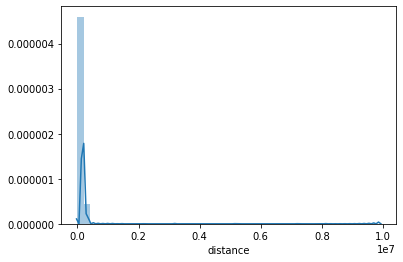

In [93]:
sns.distplot(df['distance'])

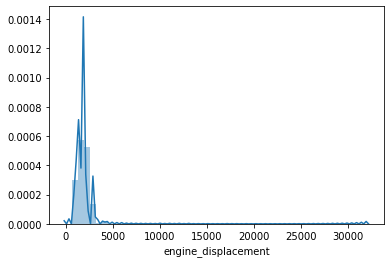

In [94]:
sns.distplot(df['engine_displacement'])

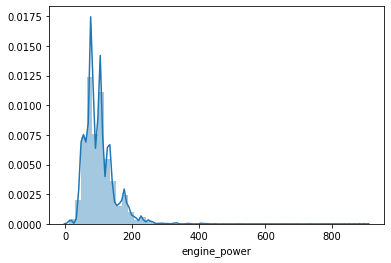

In [95]:
sns.distplot(df['engine_power'])

In [96]:
df['engine_power']=df['engine_power'].apply(lambda x: np.log(x+1))
df['engine_displacement']=df['engine_displacement'].apply(lambda x: np.log(x+1))
df['Distance ']=df['distance'].apply(lambda x: np.log(x+1))

In [97]:
df.head()

,Maker,model,Location,distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,6,8,0,11.090126,2,55,7.583248,4.997212,8,1,3,4,1,543764.25
1,2,9,0,10.231027,3,7,7.125283,3.951244,6,1,3,3,1,401819.25
2,1,18,5,10.736418,3,5,7.598900,4.663439,7,0,3,4,0,2392855.50
3,5,6,9,10.690808,3,8,7.389564,4.948760,7,1,3,4,1,958606.50
4,1,20,6,10.994152,1,7,8.004366,5.198497,7,0,3,4,0,3085561.50


In [98]:
y=df['Price']
X=df.drop('Price',axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [100]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [101]:
mse=mean_squared_error(y_test,y_pred)
mse

206550181436.51086

In [102]:
rmse=np.sqrt(mse)
rmse

454477.9218361557

In [103]:
from sklearn.ensemble import RandomForestRegressor



In [104]:


forest_reg = RandomForestRegressor(random_state=42, n_jobs =1, max_depth = 30 )
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [105]:
y_pred=forest_reg.predict(X_test)

In [106]:
mse=mean_squared_error(y_test,y_pred)
mse

45334057566.79118

In [107]:
rmse=np.sqrt(mse)
rmse

212917.95970934717

In [144]:
y_pred=forest_reg.predict(df1)

In [145]:
df2=pd.read_csv('Test Data Set.csv')

In [146]:
prediction = pd.DataFrame({'Unique Id':df2['Id'],'Price':y_pred})
prediction.to_csv('Prediction.csv')

In [156]:
from sklearn.ensemble import AdaBoostRegressor

In [157]:
y=df['Price']
X=df.drop('Price',axis=1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [161]:
classifier = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
classifier.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                       

In [162]:
y_pred=forest_reg.predict(X_test)

In [163]:
mse=mean_squared_error(y_test,y_pred)
mse

45334057566.79118

In [164]:
rmse=np.sqrt(mse)
rmse

212917.95970934717

In [165]:
y_pred=forest_reg.predict(df1)

In [166]:
df2=pd.read_csv('Test Data Set.csv')

In [167]:
prediction = pd.DataFrame({'Unique Id':df2['Id'],'Price':y_pred})
prediction.to_csv('Prediction1.csv')

In [209]:
from xgboost import XGBRegressor 

In [210]:
y=df['Price']
X=df.drop('Price',axis=1)

In [211]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [212]:
classifier = XGBRegressor()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[15:00:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [213]:
mse=mean_squared_error(y_test,y_pred)
mse

47461847250.942894

In [214]:
rmse=np.sqrt(mse)
rmse

217857.40118468064

In [177]:
from sklearn.feature_selection import RFE

In [178]:
y=df['Price']
X=df.drop('Price',axis=1)

In [179]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [181]:
X_train.shape

(37460, 13)

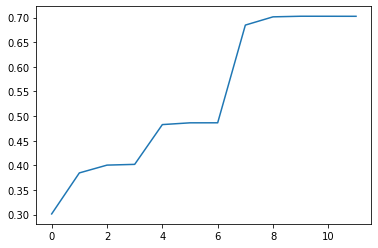

In [182]:
nnof_list=12
score_list=[]

for n in range(nnof_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)
    
plt.plot(score_list)

In [183]:
score_list

[0.3014642793095095,
 0.3846964962277818,
 0.4005349116772473,
 0.40205894038597223,
 0.48281196520461506,
 0.4863945900988845,
 0.4864503598504497,
 0.6848154918913254,
 0.7015466451572911,
 0.7027712788754534,
 0.702737860084153,
 0.7026567337126146]

In [204]:
cols=list(X_train.columns)
model=LinearRegression()
rfe=RFE(model,13)
X_train_rfe=rfe.fit_transform(X_train,y_train)
model.fit(X_train_rfe,X_train)
temp=pd.Series(rfe.support_,index=cols)
selected_features=list(temp[temp==True].index)
print(selected_features)

['Maker', 'model', 'Location', 'distance', 'Owner Type', 'Age of car', 'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count', 'fuel_type']


In [205]:
lr=LinearRegression(fit_intercept=True)

lr.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
y_pred=lr.predict(X_test)

In [207]:
mse=mean_squared_error(y_test,y_pred)
mse

207162299783.13422

In [208]:
rmse=np.sqrt(mse)
rmse

455150.8538749919

In [215]:
from sklearn.neighbors import KNeighborsRegressor

In [217]:
y=df['Price']
X=df.drop('Price',axis=1)

In [218]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=2)

In [219]:
param_grid={
    'criterion':['mse'],
    'n_estimators':[150,100,75,50],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[5,8,10,12]
}

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score,
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from vecstack import stacking

In [350]:
X_train.shape

(37460, 13)

In [223]:
Crfc=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=3)
Crfc.fit(X_train,y_train)
y_pred=Crfc.predict(X_test)

[15:05:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:05:46] WARNI

[15:07:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:06] WARNI

[15:11:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:32] WARNI

In [358]:
print(Crfc.best_score_)
print(Crfc.best_params_)
print(Crfc.best_estimator_)

0.9184351876645396
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, criterion='mse', gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, max_features='auto', min_child_weight=1, missing=None,
             n_estimators=150, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [301]:
rmse=np.sqrt(mse)
rmse

192638.79908061342

In [351]:
df1.shape

(5615, 13)

In [ ]:
df1['Distance']=df1['Distance'].rename

In [354]:
df1.rename(columns={'Distance ':'distance'},inplace=True)

In [355]:
y_pred=Crfc.predict(df1)

In [356]:
df2=pd.read_csv('Test Data Set.csv')

In [357]:
prediction = pd.DataFrame({'Unique Id':df2['Id'],'Price':y_pred_test})
prediction.to_csv('Prediction2.csv')